In [43]:
#Important modules to bring in
import pandas as panda
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
train = panda.read_csv("train.csv") #Use pandas to read the comma seperated values
train.columns #Print out all columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [45]:
#using describe on the tutorial's most important variables
print("Sale Price:")
train['SalePrice'].describe() #Check to see if min and max range isn't anywhere illegal

Sale Price:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [46]:
print("GrLivArea:")
train['GrLivArea'].describe()

GrLivArea:


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [47]:
print("TotalBsmtSF:")
train['TotalBsmtSF'].describe()

TotalBsmtSF:


count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [48]:
print("YearBuilt:")
train['YearBuilt'].describe()

YearBuilt:


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [49]:
print("OverallQual:")
train['OverallQual'].describe()

OverallQual:


count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [58]:
print(train['SalePrice']) #To call upon a specific column prints all of it's data with an extra column for indexing rows.

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64


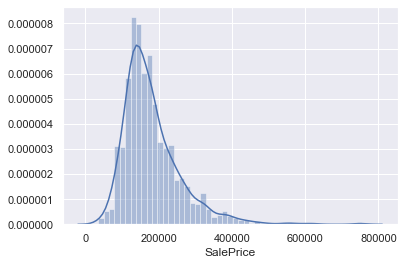

In [50]:
sns.distplot(train['SalePrice']); #Check to see if there is a normal distribution

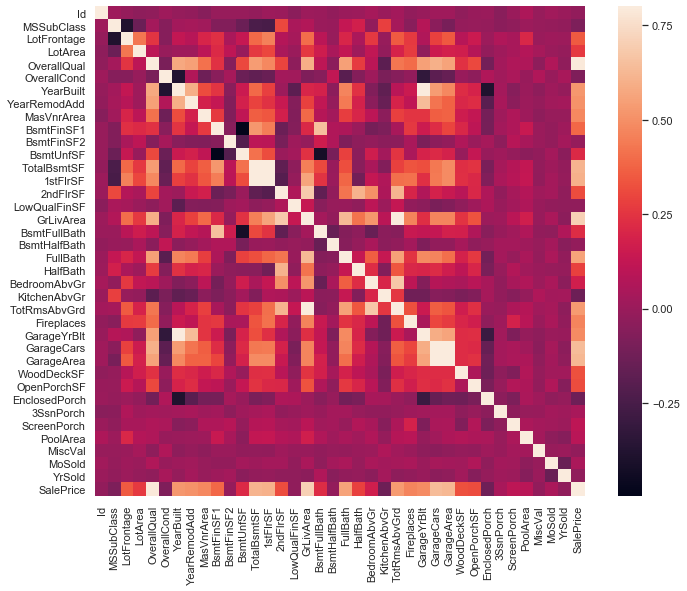

In [51]:
#Correlation matrix, Each column's data is compared with each other columns and the correlation is presented on a heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

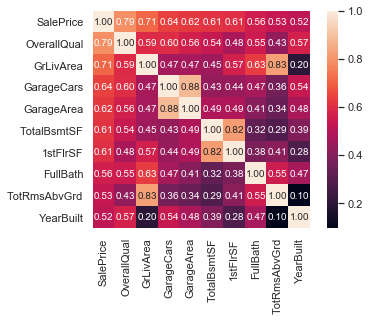

In [52]:
#A good place to start looking is 'SalePrice' with everything else
numcorrelations = 10 #10 largest correlations with SalePrice
cols = corrmat.nlargest(numcorrelations, 'SalePrice')['SalePrice'].index #Ordered by largest correlations
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

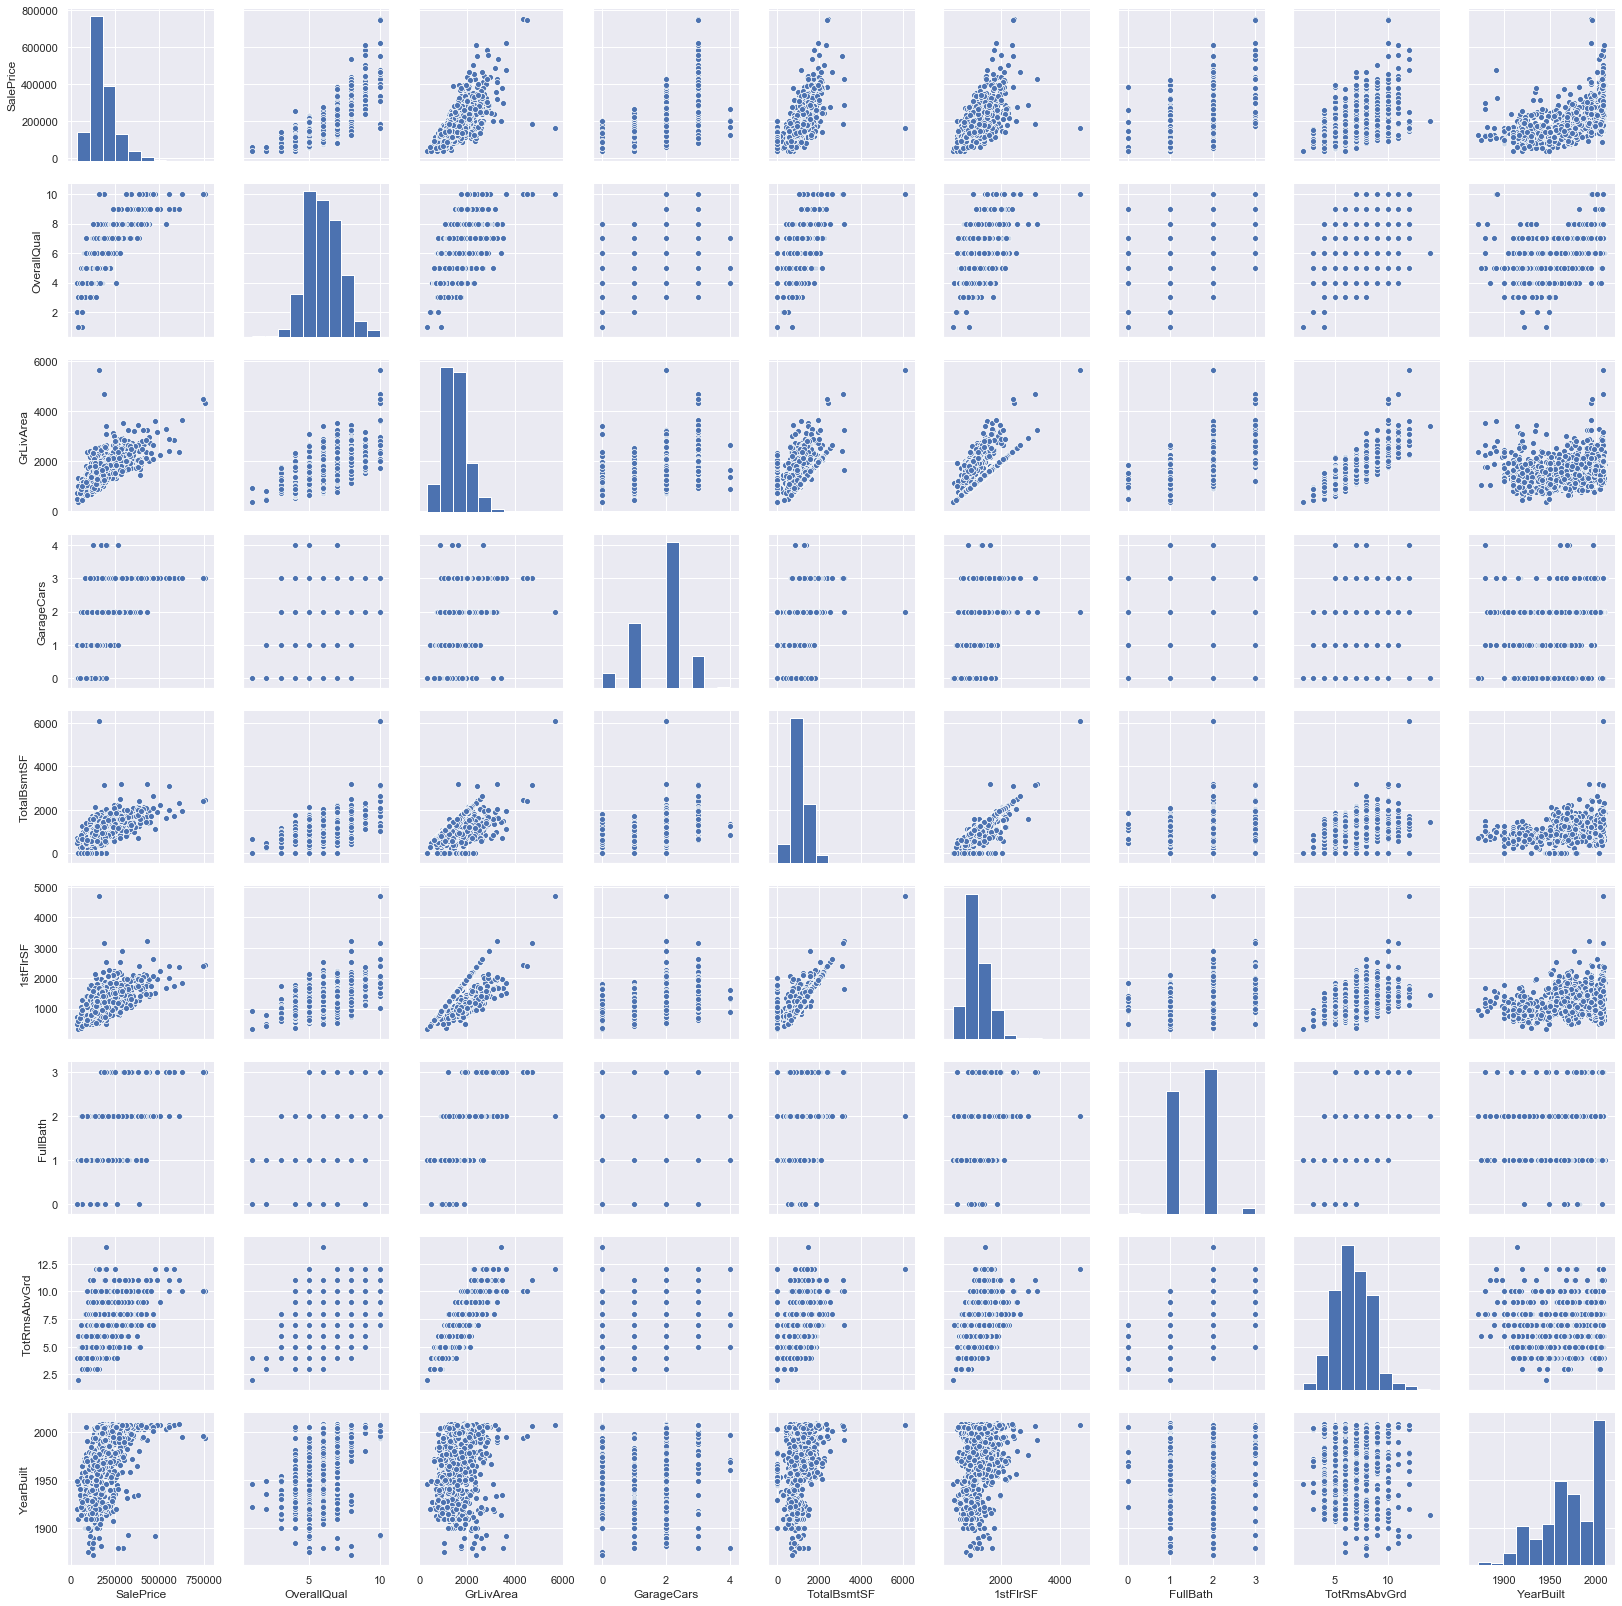

In [53]:
#paired scatter plots by X and Y of all columns
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [59]:
total = train.isnull().sum().sort_values(ascending=False) #Create sums for each count of missing data in each column
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False) #Create a percentage from that
missing_data = panda.concat([total, percent], axis=1, keys=['Total', 'Percent']) #Creates a new table that contains the sorted list of all columns with no data and how much is missing
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1) #Removes all columns with more than 1 bit of missing data
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #Check that there is no more

0

In [60]:
#Applying log transformations to fixed skewness.
train['SalePrice'] = np.log(train['SalePrice'])
train['GrLivArea'] = np.log(train['GrLivArea'])

In [61]:
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index) #Create a new column with as many rows as TotalBsmtSF
train['HasBsmt'] = 0 #By default all rows have the value of 0 (False, they have no basement)
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1 #UNLESS, the totalbsmtsf is more than 0, implying there is a basement, so change to 1 (True)

train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF']) #Wherever there IS a basement, apply the log transformation to the TotalBsmtSF col

In [62]:
#convert categorical columns to dummies
train = panda.get_dummies(train)

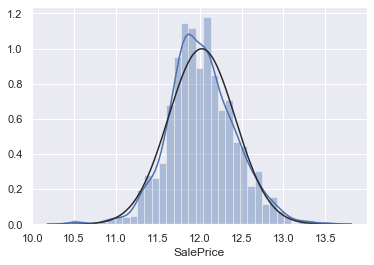

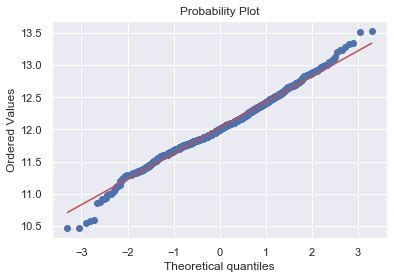

In [63]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

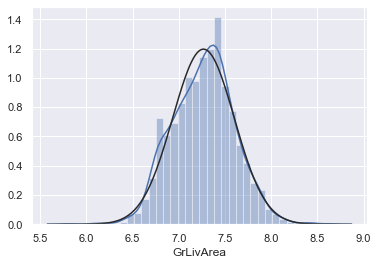

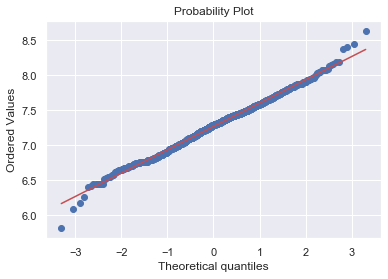

In [64]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

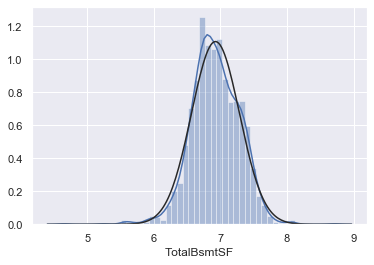

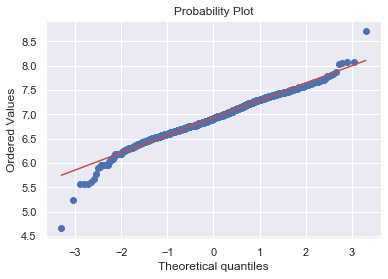

In [67]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)